## Filters

In [0]:
def noise(img):
    result = np.zeros(img.shape)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
          for k in range(0, img.shape[2]):
            result[i][j][k] = (np.random.randint(7)-3)

    return np.array(result)

## Import model

In [0]:
# !pip install keras_gradient_noise

In [0]:
# import keras_gradient_noise

In [16]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

model = ResNet50(weights='imagenet')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import image

In [0]:
img_path = 'drive/My Drive/Colab Notebooks/images/car/car1.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_ar = image.img_to_array(img)
img_ar2 = image.img_to_array(img)

In [160]:
x = np.expand_dims(np.copy(img_ar), axis=0)
x = preprocess_input(x)
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=1)[0][0][1])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

Predicted: sports_car


## testdata ＝ selfdatas＋noise

In [161]:
noisefilter = noise(np.copy(img_ar))
ns = np.copy(img_ar) + noisefilter
nss = np.expand_dims(np.copy(ns), axis=0)
nss = preprocess_input(nss)
preds = model.predict(nss)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=1)[0][0][1])

Predicted: sports_car


## Filters

In [162]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

blur1 = cv2.blur(np.copy(img_ar),(5,5))
blur2 = cv2.medianBlur(np.copy(img_ar),5)
blur3 = cv2.GaussianBlur(np.copy(img_ar),(5,5),0)
blur4 = cv2.bilateralFilter(np.copy(img_ar),9,224,224)

for t in [blur1, blur2, blur3, blur4]:
  z = np.expand_dims(np.copy(t), axis=0)
  z = preprocess_input(z)
  preds = model.predict(z)
  print('Predicted:', decode_predictions(preds, top=1)[0][0][1])

Predicted: sports_car
Predicted: sports_car
Predicted: sports_car
Predicted: sports_car


In [0]:
#read library for visualization
%matplotlib inline
import matplotlib.pyplot as plt

(-0.5, 223.5, 223.5, -0.5)

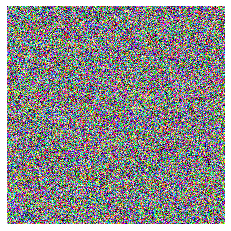

In [57]:
plt.imshow(image.array_to_img(noisefilter))
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

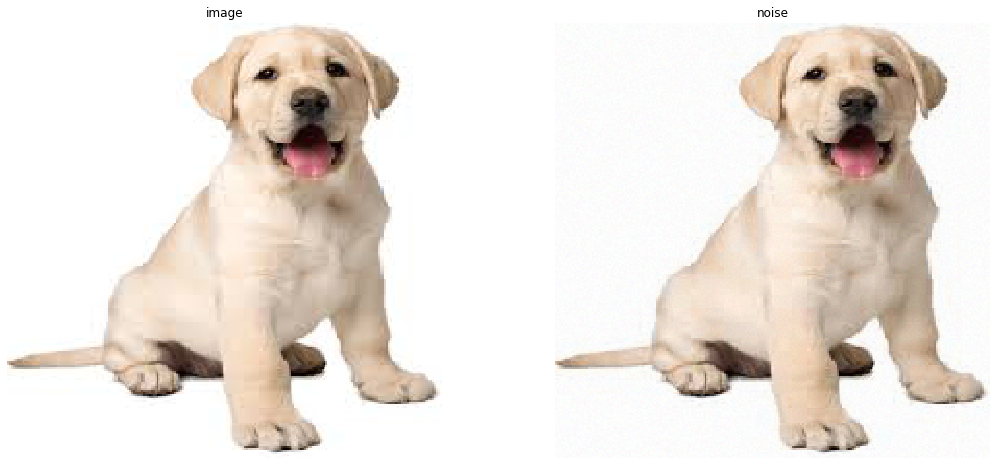

In [58]:
# Visualization of data
img_noise = image.array_to_img(ns)
# img_average = image.array_to_img(avg)
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].imshow(image.array_to_img(img_ar))
ax[0].set_title("image")
ax[0].axis('off')
ax[1].imshow(img_noise)
ax[1].set_title("noise")
ax[1].axis('off')